# **Распознавание рукописных цифр**

---



В этой статье я буду использовать набор MNIST, который представляет собой набор данных, содержащий 70000 рукописных буквенно-цифровых изображений от 0 до 9 размером 28x28.

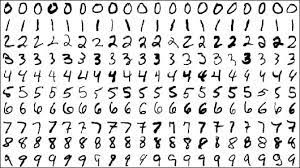

## **1. Библиотека импорта**

In [1]:
import keras

from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist

## **2. Загрузить и разделить данные**

> После импорта необходимых библиотек нам нужно загрузить данные и проверить данные.



In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


Данные mnist были разделены на 2 части, включая 60 000 обучающих данных и 10 000 тестовых данных. X_train, X_test - это данные, представляющие числа y_train, y_test - метки этих чисел, я делю числа на 255, чтобы нормализовать их от 0-255 до 0-1, а для меток чисел я использую функцию to_categorical, позволяющую одному горячее кодирование

## **3. Постройте модель проблемы.**
> Я помогу вам создать модель с нуля двумя способами: модель Sequential и API функций.



### **3.1. Создайте модель keras, используя модель Sequential:**

In [4]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## *Объяснение приведенного выше кода:*
*   Сначала я инициализирую последовательную модель для проблемы.
*   Наш вход - это размерная матрица 28x28, которую мы будем использовать Flatten, чтобы выпрямить нас в массив.
*   Dense - это способ объявить слой в Keras, при этом output_dim является выходным измерением этого слоя, а активация - функцией активации слоя, каждый должен узнать обо всех функциях активации, чтобы выбрать для себя правильную функцию активации. Каждая проблема
*   На выходе задачи мы будем использовать функцию активации, чтобы вычислить вероятность того, что это за изображение.

*   Функция компиляции - это функция, которая нам нужна для идентификации оптимизаторов во время обучения. 



### **3.2. Создайте модель keras с помощью Function API:**

In [6]:
# Function API 
input_ = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_)
hidden1 = Dense(2**14, activation="relu")(flatten)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(28*28, activation='relu')(hidden2)
reshap = Reshape((28, 28))(hidden3)
concat_ = Concatenate()([input_, reshap])
flatten2 = Flatten(input_shape=[28, 28])(concat_)
output = Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output] )
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16384)        12861440    flatten_2[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          8389120     dense_3[0][0]                    
______________________________________________________________________________________________

Вы можете использовать один из двух методов, описанных выше, для создания моделей. 

## **4. Проведите обучение модели:**

In [8]:
model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 12s - loss: 0.2046 - accuracy: 0.9385
Epoch 2/10
1875/1875 - 9s - loss: 0.1001 - accuracy: 0.9696
Epoch 3/10
1875/1875 - 9s - loss: 0.0719 - accuracy: 0.9787
Epoch 4/10
1875/1875 - 9s - loss: 0.0555 - accuracy: 0.9840
Epoch 5/10
1875/1875 - 9s - loss: 0.0469 - accuracy: 0.9860
Epoch 6/10
1875/1875 - 9s - loss: 0.0404 - accuracy: 0.9884
Epoch 7/10
1875/1875 - 9s - loss: 0.0394 - accuracy: 0.9891
Epoch 8/10
1875/1875 - 9s - loss: 0.0330 - accuracy: 0.9907
Epoch 9/10
1875/1875 - 9s - loss: 0.0316 - accuracy: 0.9917
Epoch 10/10
1875/1875 - 9s - loss: 0.0316 - accuracy: 0.9917


Функция соответствия - это функция, используемая для начала обучения данных. Вам нужно поместить на изображение числа и обозначить числа, которые были обработаны выше. Эпох - количество итераций обучения. Поскольку это простой пост, я не разделяю данные проверки. 

## **5. Оценка модели:**

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.12053250521421432, 0.9817000031471252]


## **6. Прогноз:**

In [17]:
y_predict = np.argmax(model.predict(X_test[2021].reshape(1,28,28,1)))
print('Прогнозы - это числа: ', y_predict)

Прогнозы - это числа:  5


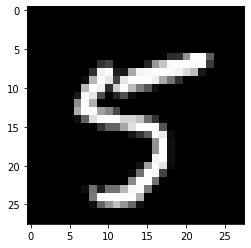

In [18]:
import numpy as np
plt.imshow(X_test[2021].reshape(28,28), cmap='gray')